In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Increasing the number of rows and columns shown to visualize everything
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
from sqlalchemy import create_engine

driver = 'mysql+pymysql:'
user = 'root'
password = ''
ip = '35.198.146.55'
database = 'exoplanets'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

#pzone_class.to_sql('pzone_class', con=engine, if_exists='replace')

In [3]:
#Loading data
phl = pd.read_csv('../datasets/phl_hec_all_confirmed.csv', error_bad_lines=False)
phl.head()

b'Skipping line 3742: expected 68 fields, saw 69\nSkipping line 3743: expected 68 fields, saw 69\n'


,P. Name,P. Name Kepler,P. Name KOI,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Habitable Class,P. Min Mass (EU),P. Mass (EU),P. Max Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),P. Esc Vel (EU),P. SFlux Min (EU),P. SFlux Mean (EU),P. SFlux Max (EU),P. Teq Min (K),P. Teq Mean (K),P. Teq Max (K),P. Ts Min (K),P. Ts Mean (K),P. Ts Max (K),P. Surf Press (EU),P. Mag,P. Appar Size (deg),P. Period (days),P. Sem Major Axis (AU),P. Eccentricity,P. Mean Distance (AU),P. Inclination (deg),P. Omega (deg),S. Name,S. Name HD,S. Name HIP,S. Constellation,S. Type,S. Mass (SU),S. Radius (SU),S. Teff (K),S. Luminosity (SU),S. [Fe/H],S. Age (Gyrs),S. Appar Mag,S. Distance (pc),S. RA (hrs),S. DEC (deg),S. Mag from Planet,S. Size from Planet (deg),S. No. Planets,S. No. Planets HZ,S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. SPH,P. Int ESI,P. Surf ESI,P. ESI,S. HabCat,P. Habitable,P. Hab Moon,P. Confirmed,P. Disc. Method,P. Disc. Year
0,1RXS 1609 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,4451.16,NaN,19.04,0.64,12.28,15.29,4.079750e-06,4.079751e-06,4.079751e-06,11.4,11.4,11.4,NaN,NaN,NaN,2870.4,-10.06,36.81,NaN,330.0,0.0,330.0,NaN,0.0,1RXS 1609,NaN,NaN,Sco,K7V,0.73,1.35,4060.0,0.444285,NaN,0.011,NaN,145.0,16.1583,-21.0828,-13.2,0.0022,1,0,0.540,1.362,800.07,23.51,85.62,0.00,NaN,0.0,0.0,0.05,0,0,0,1,Imaging,2008.00
1,1SWASP J1407 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,6358.80,NaN,10.94,4.86,53.12,24.11,0.02166914,0.02166914,0.02166914,97.7,97.7,97.7,NaN,NaN,NaN,30873.8,-18.21,20.91,3725.0,3.9,0.0,3.9,NaN,0.0,1SWASP J1407,NaN,NaN,Cen,K,0.90,0.99,4400.0,0.329588,NaN,0.016,12.4,133.0,14.1300,-39.7619,-22.5,0.1353,1,0,0.461,1.143,9.07,15.30,45.41,0.02,NaN,0.0,0.0,0.07,0,0,0,1,Primary Transit,2012.00
2,2M 0103-55(AB) b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,4133.22,4133.22,NaN,11.40,2.79,31.79,19.04,3.961934e-06,3.961934e-06,3.961935e-06,11.4,11.4,11.4,NaN,NaN,NaN,11520.8,-8.91,21.80,NaN,84.0,0.0,84.0,NaN,0.0,2M 0103-55(AB),NaN,NaN,Phe,M,0.40,0.38,3840.0,0.027955,NaN,0.030,NaN,47.2,1.0600,-55.2656,-13.2,0.0024,1,0,0.136,0.347,793.67,12.57,107.44,0.00,NaN,0.0,0.0,0.06,0,0,0,1,Imaging,2013.00
3,2M 0122-24 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,6358.80,NaN,11.20,4.53,50.69,23.83,1.033854e-05,1.033854e-05,1.033854e-05,14.4,14.4,14.4,NaN,NaN,NaN,28780.4,-9.92,21.41,NaN,52.0,0.0,52.0,NaN,0.0,2M 0122-24,NaN,NaN,Cet,M3.5,0.40,0.38,3840.0,0.027955,NaN,0.120,NaN,36.0,1.3808,-24.6142,-14.2,0.0039,1,0,0.136,0.347,490.45,15.72,119.46,0.00,NaN,0.0,0.0,0.08,0,0,0,1,Imaging,2013.00
4,2M 0219-39 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,4419.37,NaN,16.13,1.05,16.99,16.55,2.368772e-07,2.368772e-07,2.368773e-07,5.6,5.6,5.6,NaN,NaN,NaN,4655.6,-6.60,31.03,NaN,156.0,0.0,156.0,NaN,0.0,2M 0219-39,NaN,NaN,For,M6,0.11,0.27,3064.0,0.005765,NaN,NaN,NaN,39.4,2.3228,-39.4231,-10.1,0.0009,1,0,0.062,0.165,3028.82,19.46,133.25,0.00,NaN,0.0,0.0,0.06,0,0,0,1,Imaging,2015.00


In [4]:
phl.shape

(3873, 68)

## Dropping information and dealing with NaN values

In [5]:
# Removing columns with no valuable information for the project
phl.drop(['P. Name Kepler', 'P. Int ESI', 'P. Surf ESI', 'S. HabCat', 'P. SPH', 'S. Size from Planet (deg)', 'S. Mag from Planet', 'S. Appar Mag', 'P. Omega (deg)', 'S. Name HIP', 'S. [Fe/H]', 'P. Inclination (deg)', 'P. Name KOI', 'S. Name HD', 'P. Min Mass (EU)', 'P. Max Mass (EU)', 'P. SFlux Min (EU)', 'P. SFlux Max (EU)', 'P. Teq Min (K)', 'P. Teq Max (K)', 'P. Ts Min (K)', 'S. Constellation', 'S. Name', 'P. Ts Max (K)'], axis=1, inplace=True)

In [6]:
# Checking the number of NaNs on the columns left
phl.isnull().sum()

P. Name                      0
P. Zone Class               46
P. Mass Class                6
P. Composition Class        41
P. Atmosphere Class         85
P. Habitable Class           0
P. Mass (EU)                33
P. Radius (EU)              12
P. Density (EU)             41
P. Gravity (EU)             41
P. Esc Vel (EU)             41
P. SFlux Mean (EU)           0
P. Teq Mean (K)             46
P. Ts Mean (K)            2125
P. Surf Press (EU)          41
P. Mag                      56
P. Appar Size (deg)         12
P. Period (days)           150
P. Sem Major Axis (AU)      35
P. Eccentricity              0
P. Mean Distance (AU)       35
S. Type                     84
S. Mass (SU)                47
S. Radius (SU)             112
S. Teff (K)                 99
S. Luminosity (SU)          28
S. Age (Gyrs)             1551
S. Distance (pc)          1187
S. RA (hrs)                  0
S. DEC (deg)                 0
S. No. Planets               0
S. No. Planets HZ            0
S. Hab Z

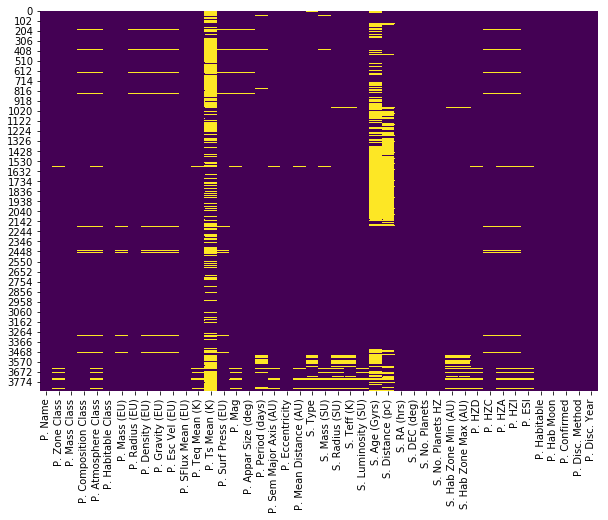

In [7]:
# Visualizing the NaN values left
plt.figure(figsize=(10,7))
sns.heatmap(phl.isnull(), cbar = False, cmap='viridis')

In [8]:
# Removing column with high volume of NaNs (>1K)
phl.drop(['P. Ts Mean (K)', 'S. Age (Gyrs)', 'S. Distance (pc)'], axis=1, inplace=True)

In [9]:
# Cheacking that the types of the columns are properly assigned
phl.dtypes

P. Name                    object
P. Zone Class              object
P. Mass Class              object
P. Composition Class       object
P. Atmosphere Class        object
P. Habitable Class         object
P. Mass (EU)              float64
P. Radius (EU)            float64
P. Density (EU)           float64
P. Gravity (EU)           float64
P. Esc Vel (EU)           float64
P. SFlux Mean (EU)         object
P. Teq Mean (K)           float64
P. Surf Press (EU)        float64
P. Mag                    float64
P. Appar Size (deg)       float64
P. Period (days)          float64
P. Sem Major Axis (AU)    float64
P. Eccentricity           float64
P. Mean Distance (AU)     float64
S. Type                    object
S. Mass (SU)              float64
S. Radius (SU)            float64
S. Teff (K)               float64
S. Luminosity (SU)        float64
S. RA (hrs)               float64
S. DEC (deg)              float64
S. No. Planets              int64
S. No. Planets HZ           int64
S. Hab Zone Mi

'P. SFlux Mean (EU)' and 'P. Disc. Year' are objects when they should be numeric.

In [10]:
# Changing the type of the columns to float64
phl['P. SFlux Mean (EU)'] = pd.to_numeric(phl['P. SFlux Mean (EU)'], errors='coerce')
phl['P. Disc. Year'] = pd.to_numeric(phl['P. Disc. Year'], errors='coerce')

print(phl['P. SFlux Mean (EU)'].dtype)
print(phl['P. SFlux Mean (EU)'].head())

print(phl['P. Disc. Year'].dtype)
print(phl['P. Disc. Year'].head())

float64
0    4.079751e-06
1    2.166914e-02
2    3.961934e-06
3    1.033854e-05
4    2.368772e-07
Name: P. SFlux Mean (EU), dtype: float64
float64
0    2008.0
1    2012.0
2    2013.0
3    2013.0
4    2015.0
Name: P. Disc. Year, dtype: float64


### Renaming columns for better used on SQL

In [11]:
phl.columns

Index(['P. Name', 'P. Zone Class', 'P. Mass Class', 'P. Composition Class', 'P. Atmosphere Class', 'P. Habitable Class', 'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)', 'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Mean (EU)', 'P. Teq Mean (K)', 'P. Surf Press (EU)', 'P. Mag', 'P. Appar Size (deg)', 'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Eccentricity', 'P. Mean Distance (AU)', 'S. Type', 'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)', 'S. RA (hrs)', 'S. DEC (deg)', 'S. No. Planets', 'S. No. Planets HZ', 'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)', 'P. HZD', 'P. HZC', 'P. HZA', 'P. HZI', 'P. ESI', 'P. Habitable', 'P. Hab Moon', 'P. Confirmed', 'P. Disc. Method', 'P. Disc. Year'], dtype='object')

In [12]:
cols = phl.columns
new_cols = []

for name in cols:
    if (' ' in name) or ('.' in name) or ('(' in name) or (')' in name):
        name = name.replace(' ', '_')
        name = name.replace('.', '')
        name = name.replace('(', '')
        name = name.replace(')', '')
        new_cols.append(name)
    else:
        new_cols.append(name)
        
phl.columns = new_cols

In [13]:
phl.columns

Index(['P_Name', 'P_Zone_Class', 'P_Mass_Class', 'P_Composition_Class', 'P_Atmosphere_Class', 'P_Habitable_Class', 'P_Mass_EU', 'P_Radius_EU', 'P_Density_EU', 'P_Gravity_EU', 'P_Esc_Vel_EU', 'P_SFlux_Mean_EU', 'P_Teq_Mean_K', 'P_Surf_Press_EU', 'P_Mag', 'P_Appar_Size_deg', 'P_Period_days', 'P_Sem_Major_Axis_AU', 'P_Eccentricity', 'P_Mean_Distance_AU', 'S_Type', 'S_Mass_SU', 'S_Radius_SU', 'S_Teff_K', 'S_Luminosity_SU', 'S_RA_hrs', 'S_DEC_deg', 'S_No_Planets', 'S_No_Planets_HZ', 'S_Hab_Zone_Min_AU', 'S_Hab_Zone_Max_AU', 'P_HZD', 'P_HZC', 'P_HZA', 'P_HZI', 'P_ESI', 'P_Habitable', 'P_Hab_Moon', 'P_Confirmed', 'P_Disc_Method', 'P_Disc_Year'], dtype='object')

# Outliers

### Boxplots

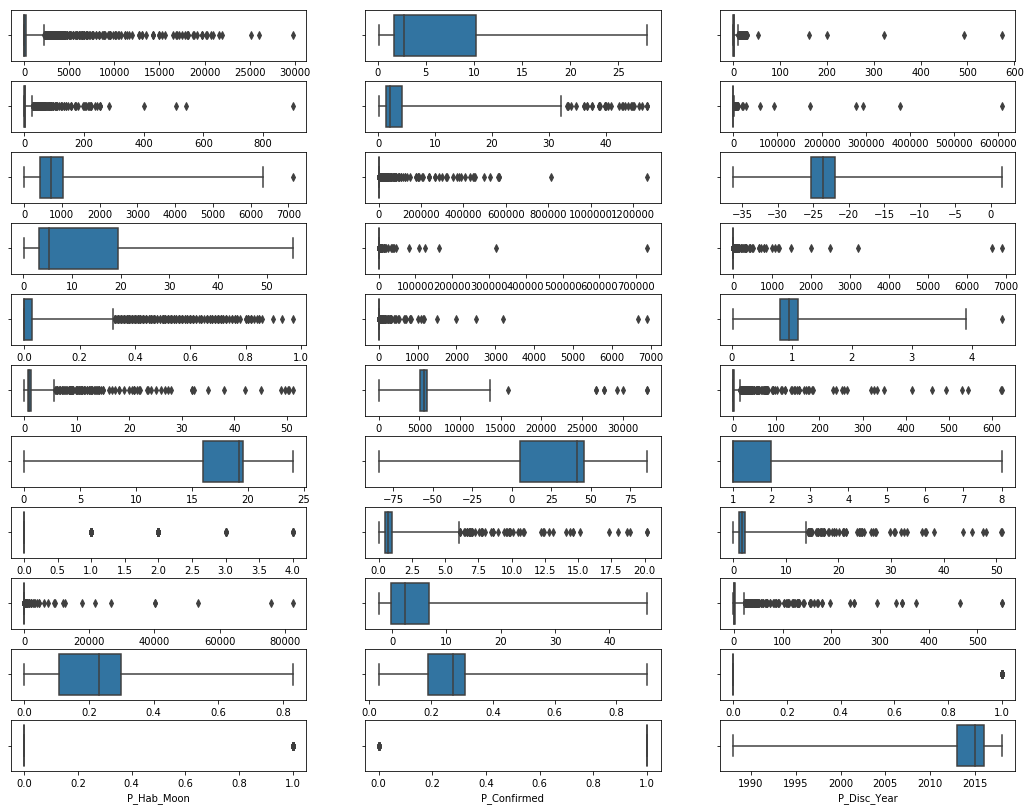

In [14]:
# Visualizing the outliers with boxplots

phl_o = phl._get_numeric_data() # Getting only numerical information from dataset

f = plt.figure(figsize=(18, 14))
i=1
import math
for col in phl_o.columns:
    subplot = f.add_subplot(math.ceil(phl_o.shape[1]/3),3,i)
    sns.boxplot(x=phl_o[col].dropna(),whis=10)
    i=i+1
plt.subplots_adjust(hspace=0.4)
plt.show()

### IQR

Removing of outliers from the whole table

In [15]:
# Selecting only the columns with numeric data
#phl_numeric = phl._get_numeric_data()

In [16]:
# Calculating de IQR
#Q1 = phl_numeric.quantile(.25)
#Q3 = phl_numeric.quantile(.75)
#IQR = Q3 - Q1
#IQR

#Checking how much information we have left
#phl_o1 = phl_numeric[~((phl_numeric < (Q1 - 1.5 * IQR)) |(phl_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
#phl_o1.shape

In [17]:
#phl.shape

Since we've lost too much information, from 3873 to 3873, we change from 1.5 to 3. 

In [18]:
#phl_o3 = phl_numeric[~((phl_numeric < (Q1 - 3 * IQR)) |(phl_numeric > (Q3 + 3 * IQR))).any(axis=1)]
#phl_o3.head()

In [19]:
#phl_o3.shape

## Saving clean data to CSV

In [20]:
phl.to_csv('phl_categorical.csv', index=False)

# Categorizing columns for SQL

In [21]:
set(phl['P_Zone_Class'])

zone_dict = {np.nan:0, 'Cold':1, 'Warm':2, 'Hot':3}

phl['P_Zone_Class'] = phl['P_Zone_Class'].apply(lambda x: zone_dict[x])

In [22]:
mass_dict = {'Jovian':6, 'Mercurian':1, 'Neptunian':5, 'Subterran':2, 'Superterran':4, 'Terran':3, np.nan:0}

phl['P_Mass_Class'] = phl['P_Mass_Class'].apply(lambda x: mass_dict[x])

In [23]:
set(phl['P_Composition_Class'])

{'gas', 'iron', nan, 'rocky-iron', 'rocky-water', 'water-gas'}

In [24]:
comp_dict = {'gas':5, 'iron':1, np.nan:0, 'rocky-iron':2, 'rocky-water':3, 'water-gas':4}

phl['P_Composition_Class'] = phl['P_Composition_Class'].apply(lambda x: comp_dict[x])

In [25]:
set(phl['P_Habitable_Class'])

{'hypopsychroplanet',
 'mesoplanet',
 'non-habitable',
 'psychroplanet',
 'thermoplanet'}

In [26]:
hab_dict = {'hypopsychroplanet':1, 'mesoplanet':3, 'non-habitable':0, 'psychroplanet':2, 'thermoplanet':4}

phl['P_Habitable_Class'] = phl['P_Habitable_Class'].apply(lambda x: hab_dict[x])

In [27]:
phl.head()

,P_Name,P_Zone_Class,P_Mass_Class,P_Composition_Class,P_Atmosphere_Class,P_Habitable_Class,P_Mass_EU,P_Radius_EU,P_Density_EU,P_Gravity_EU,P_Esc_Vel_EU,P_SFlux_Mean_EU,P_Teq_Mean_K,P_Surf_Press_EU,P_Mag,P_Appar_Size_deg,P_Period_days,P_Sem_Major_Axis_AU,P_Eccentricity,P_Mean_Distance_AU,S_Type,S_Mass_SU,S_Radius_SU,S_Teff_K,S_Luminosity_SU,S_RA_hrs,S_DEC_deg,S_No_Planets,S_No_Planets_HZ,S_Hab_Zone_Min_AU,S_Hab_Zone_Max_AU,P_HZD,P_HZC,P_HZA,P_HZI,P_ESI,P_Habitable,P_Hab_Moon,P_Confirmed,P_Disc_Method,P_Disc_Year
0,1RXS 1609 b,1,6,5,hydrogen-rich,0,4451.16,19.04,0.64,12.28,15.29,4.079751e-06,11.4,2870.4,-10.06,36.81,NaN,330.0,0.0,330.0,K7V,0.73,1.35,4060.0,0.444285,16.1583,-21.0828,1,0,0.540,1.362,800.07,23.51,85.62,0.00,0.05,0,0,1,Imaging,2008.0
1,1SWASP J1407 b,1,6,5,hydrogen-rich,0,6358.80,10.94,4.86,53.12,24.11,2.166914e-02,97.7,30873.8,-18.21,20.91,3725.0,3.9,0.0,3.9,K,0.90,0.99,4400.0,0.329588,14.1300,-39.7619,1,0,0.461,1.143,9.07,15.30,45.41,0.02,0.07,0,0,1,Primary Transit,2012.0
2,2M 0103-55(AB) b,1,6,5,hydrogen-rich,0,4133.22,11.40,2.79,31.79,19.04,3.961934e-06,11.4,11520.8,-8.91,21.80,NaN,84.0,0.0,84.0,M,0.40,0.38,3840.0,0.027955,1.0600,-55.2656,1,0,0.136,0.347,793.67,12.57,107.44,0.00,0.06,0,0,1,Imaging,2013.0
3,2M 0122-24 b,1,6,5,hydrogen-rich,0,6358.80,11.20,4.53,50.69,23.83,1.033854e-05,14.4,28780.4,-9.92,21.41,NaN,52.0,0.0,52.0,M3.5,0.40,0.38,3840.0,0.027955,1.3808,-24.6142,1,0,0.136,0.347,490.45,15.72,119.46,0.00,0.08,0,0,1,Imaging,2013.0
4,2M 0219-39 b,1,6,5,hydrogen-rich,0,4419.37,16.13,1.05,16.99,16.55,2.368772e-07,5.6,4655.6,-6.60,31.03,NaN,156.0,0.0,156.0,M6,0.11,0.27,3064.0,0.005765,2.3228,-39.4231,1,0,0.062,0.165,3028.82,19.46,133.25,0.00,0.06,0,0,1,Imaging,2015.0


# Saving to CSV

In [28]:
# Saving clean df with the categorical columns changed
phl.to_csv('../datasets/phl.csv', index=False)

In [29]:
#phl.to_sql('phl', con=engine, if_exists='replace')